# Matrices

In [12]:
from sympy import *
import sympy
init_printing() # Pretty printing

Make a Matrix

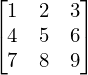

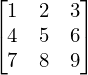

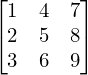

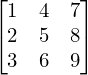

In [22]:
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
display(A)
display(A.C)
#display(A.D)
display(A.H)
display(A.T)

In [13]:
import inspect
from pprint import pprint
attributes = inspect.getmembers(sympy.Matrix, lambda a:not(inspect.isroutine(a)))
pprint(attributes)

[('C', <property object at 0x0000025BF1706368>),
 ('D', <property object at 0x0000025BF1706728>),
 ('H', <property object at 0x0000025BF1706228>),
 ('T', <property object at 0x0000025BF1706318>),
 ('__array_priority__', 11),
 ('__class__', <class 'type'>),
 ('__dict__',
  mappingproxy({'__doc__': None,
                '__module__': 'sympy.matrices.dense',
                '__new__': <staticmethod object at 0x0000025BF171C1D0>,
                '__setitem__': <function MutableDenseMatrix.__setitem__ at 0x0000025BF171D0D0>,
                '_new': <classmethod object at 0x0000025BF171C198>,
                'as_mutable': <function MutableDenseMatrix.as_mutable at 0x0000025BF171D158>,
                'col_del': <function MutableDenseMatrix.col_del at 0x0000025BF171D1E0>,
                'col_op': <function MutableDenseMatrix.col_op at 0x0000025BF171D268>,
                'col_swap': <function MutableDenseMatrix.col_swap at 0x0000025BF171D2F0>,
                'copyin_list': <function Mutable

Invert a Matrix to Solve 
$$
\mathbf{Ax}=\mathbf{b} \quad \Rightarrow \quad 
\mathbf{x}=\mathbf{A^{-1}b}
$$

Symbolic Matrices

Row-Reduction

Access Rows/Columns at a Time